In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Onboarding

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Copy of loan.xlsx to Copy of loan.xlsx


In [3]:
df = pd.read_excel('Copy of loan.xlsx')

EDA Exploratory Data Analysis

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [7]:
df.size

7982

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Data cleaning

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df1 = df.copy()

Missing value percentage

In [12]:
col = df1.columns

def missing_percentage(a):
  return df1[a].isnull().sum() / df1[a].size*100
for i in col:
  val = missing_percentage(i)
  if val >= 30:               # null value percentage more than 30% column will deleted
    del df1[i]
  elif val == 0:
    pass
  else:
    print(i,'---',val)


Gender --- 2.1172638436482085
Married --- 0.4885993485342019
Dependents --- 2.44299674267101
Self_Employed --- 5.211726384364821
LoanAmount --- 3.5830618892508146
Loan_Amount_Term --- 2.2801302931596092
Credit_History --- 8.143322475570033


In [13]:
df1.drop('Loan_ID',axis = 1, inplace = True)

In [30]:
df1.drop('Dependents',axis = 1, inplace = True)

Fillna for numerical data

In [14]:
num_col = ['LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_col:
  df1[i] = df1[i].fillna(df1[i].mean())


Fillna for catogrical value

In [15]:
catg_col = ['Self_Employed','Gender','Married','Dependents']
for i in catg_col:
  df1[i] = df1[i].fillna(df1[i].mode()[0])

In [31]:
df1.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
df1.shape

(614, 11)

Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
df1['Loan_Status'] = le.fit_transform(df1['Loan_Status'])

In [34]:
objt = ['Gender','Married','Education','Self_Employed','Property_Area']
for i in objt:
  df1[i] = le.fit_transform(df1[i])


In [59]:
df1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


X,Y Split

In [60]:
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [61]:
x.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [62]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Data Rescaling Data normalization

In [97]:
from sklearn.preprocessing import normalize
x_normalize = normalize(x)


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_normalize, y, test_size=0.2, random_state=5)

Support Vector Machine

In [99]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [100]:
svm_pred = svc.predict(x_test)

Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
LR = LogisticRegression(random_state=0)

In [103]:
LR.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [104]:
LR_pred = LR.predict(x_test)

K Nearest Neigbour

In [105]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [106]:
KNN_pred = KNN.predict(x_test)

Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

In [109]:
NB_pred = classifier.predict(x_test)

In [110]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score

confusion matrix for SVM

In [111]:
svm_cm = confusion_matrix(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

In [112]:
print(svm_cm)
print('precision ',svm_precision)
print('recall ',svm_recall)
print('accuracy ',svm_accuracy)
print('f1 ',svm_f1)

[[ 0 40]
 [ 0 83]]
precision  0.6747967479674797
recall  1.0
accuracy  0.6747967479674797
f1  0.8058252427184466


confusion matrix for LogisticRegression

In [113]:
LR_cm = confusion_matrix(y_test, LR_pred)
LR_recall = recall_score(y_test, LR_pred)
LR_precision = precision_score(y_test, LR_pred)
LR_accuracy = accuracy_score(y_test, LR_pred)
LR_f1 = f1_score(y_test, LR_pred)

In [114]:
print(LR_cm)
print('precision ',LR_precision)
print('recall ',LR_recall)
print('accuracy ',LR_accuracy)
print('f1 ',LR_f1)

[[ 0 40]
 [ 0 83]]
precision  0.6747967479674797
recall  1.0
accuracy  0.6747967479674797
f1  0.8058252427184466


Confusion matrix for KNN

In [115]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
KNN_recall = recall_score(y_test, KNN_pred)
KNN_precision = precision_score(y_test, KNN_pred)
KNN_accuracy = accuracy_score(y_test, KNN_pred)
KNN_f1 = f1_score(y_test, KNN_pred)

In [116]:
print(KNN_cm)
print('precision ',KNN_precision)
print('recall ',KNN_recall)
print('accuracy ',KNN_accuracy)
print('f1 ',KNN_f1)

[[ 6 34]
 [ 8 75]]
precision  0.6880733944954128
recall  0.9036144578313253
accuracy  0.6585365853658537
f1  0.7812500000000001


Confusion Matrix for naive bayes

In [117]:
NB_cm = confusion_matrix(y_test, NB_pred)
NB_recall = recall_score(y_test, NB_pred)
NB_precision = precision_score(y_test, NB_pred)
NB_accuracy = accuracy_score(y_test, NB_pred)
NB_f1 = f1_score(y_test, NB_pred)

In [118]:
print(NB_cm)
print('precision ',NB_precision)
print('recall ',NB_recall)
print('accuracy ',NB_accuracy)
print('f1 ',NB_f1)

[[20 20]
 [ 7 76]]
precision  0.7916666666666666
recall  0.9156626506024096
accuracy  0.7804878048780488
f1  0.8491620111731844


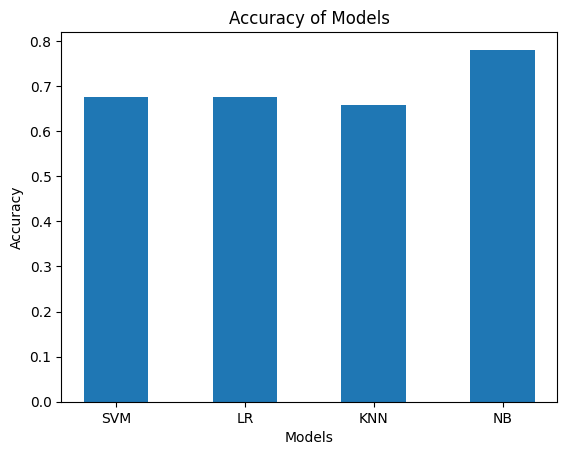

In [119]:
accuracy = [svm_accuracy, LR_accuracy, KNN_accuracy, NB_accuracy]
name = ['SVM', 'LR', 'KNN', 'NB']
plt.bar(name, accuracy, width = 0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

Naive Bayes have a high accuracy

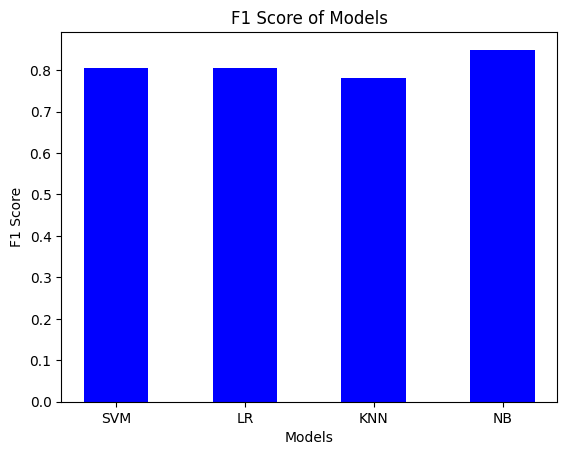

In [120]:
f1 = [svm_f1, LR_f1, KNN_f1, NB_f1]
plt.bar(name, f1, width = 0.5, color = 'blue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Models')
plt.show()

naive bayes have a high F1 score